In [1]:
import pandas as pd

Dataset Dimension: **7043** rows,  **21** columns


In [2]:
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\range\Videos\pj\churn_dataset.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [33]:
data.duplicated().any()

False

In [7]:
left_padding = 21


SEED = 42


optuna_verbosity = optuna.logging.WARNING 

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)
     

In [12]:
print(f"Dataset Dimension: {data.shape[0]} rows,  {data.shape[1]} columns")

Dataset Dimension: 7043 rows,  21 columns


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
del data["customerID"]

In [16]:
data.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [17]:
print('Known observations: {}\nUnique observations: {}'.format(len(data.index),len(data.drop_duplicates().index)))

Known observations: 7043
Unique observations: 7021


In [19]:
for feature in data.columns:
    uniq = np.unique(data[feature])
    print(feature.ljust(left_padding),len(uniq))

gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure                73
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges        1585
TotalCharges          6531
Churn                 2


In [20]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
cat_cols = set(data.columns) - set(data._get_numeric_data().columns)



for cat in cat_cols:
  print(cat.ljust(left_padding), data[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())

Partner               0
TotalCharges          11
DeviceProtection      0
Contract              0
OnlineBackup          0
PhoneService          0
StreamingTV           0
PaperlessBilling      0
PaymentMethod         0
StreamingMovies       0
InternetService       0
OnlineSecurity        0
Dependents            0
TechSupport           0
Churn                 0
gender                0
MultipleLines         0


In [23]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

In [24]:
indices_null_tc = data[data["TotalCharges"].isna()].index

In [25]:
display(data.iloc[indices_null_tc])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [26]:
display(data[data.tenure == 1].head(2))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


In [27]:
display(data[data.tenure == 3].head(2))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


In [28]:
data['TotalCharges'].fillna(0, inplace=True)

In [29]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [36]:
def binning_feature(feature):
  plt.hist(data[feature])

  
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

  bins = np.linspace(min(data[feature]), max(data[feature]), 4)
  
  group_names = ['Low', 'Medium', 'High']
  
  data.insert(data.shape[1]-1,f'{feature}-binned', pd.cut(data[feature], bins, labels=group_names, include_lowest=True))
  display(data[[feature, f'{feature}-binned']].head(10))


  
  
  display(data[f'{feature}-binned'].value_counts())


  
  plt.bar(group_names, data[f'{feature}-binned'].value_counts())
  

  
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

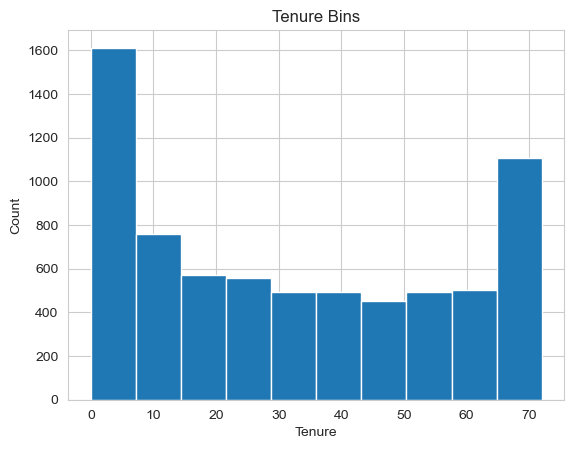

,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


Low       3210
High      2239
Medium    1594
Name: tenure-binned, dtype: int64

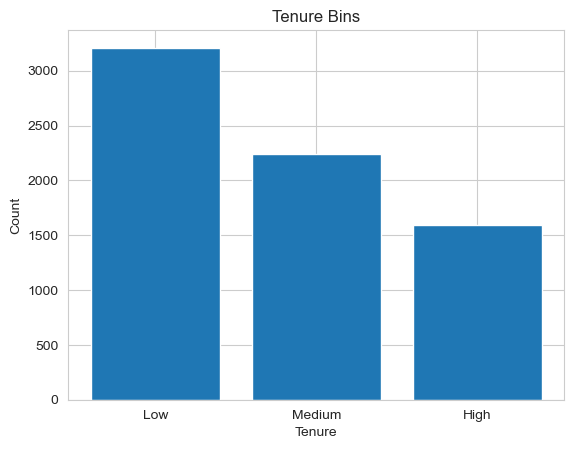

In [37]:
binning_feature('tenure')

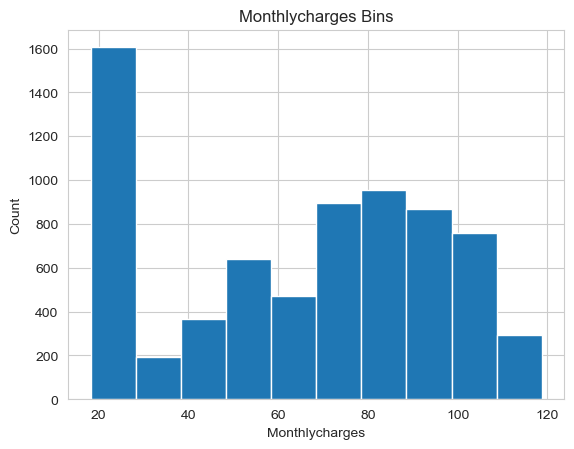

,MonthlyCharges,MonthlyCharges-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


Low       2451
Medium    2439
High      2153
Name: MonthlyCharges-binned, dtype: int64

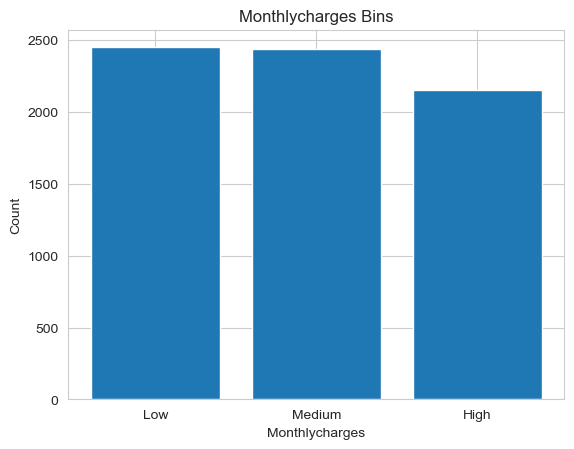

In [38]:
binning_feature('MonthlyCharges')

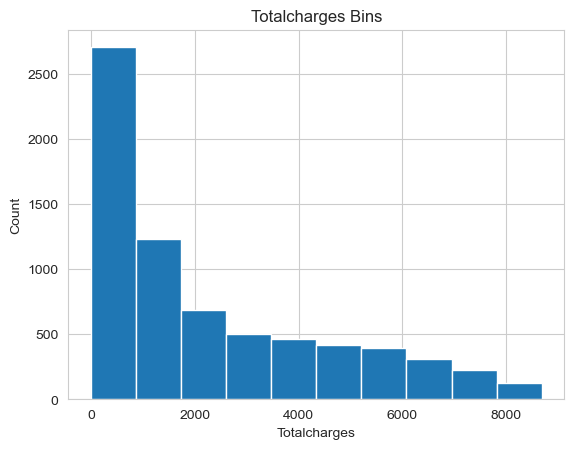

,TotalCharges,TotalCharges-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


Low       4782
Medium    1474
High       787
Name: TotalCharges-binned, dtype: int64

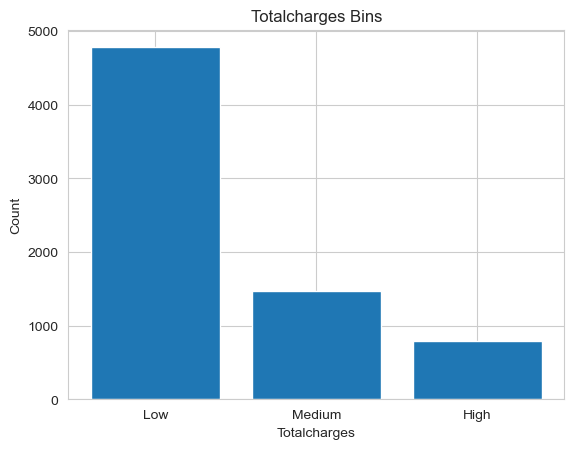

In [39]:
binning_feature('TotalCharges')

In [40]:
data.dtypes.value_counts()

object      16
category     3
int64        2
float64      2
dtype: int64

In [41]:
stat, p = stats.normaltest(data['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))


alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


In [42]:
stat, p = stats.normaltest(data['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))


alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


In [43]:
result = stats.anderson(data['TotalCharges'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
	else:
		print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 346.638
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


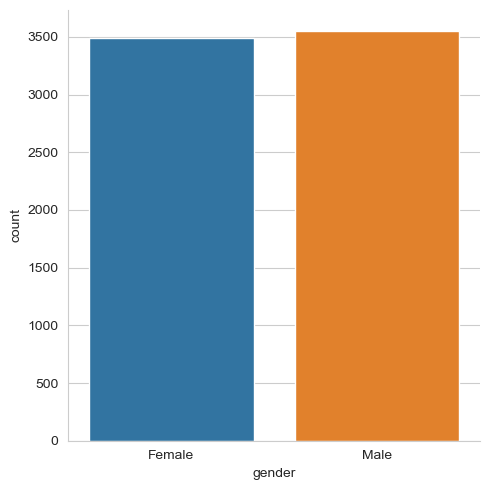

In [47]:
sns.catplot(x="gender", kind="count", data=data)
plt.show()

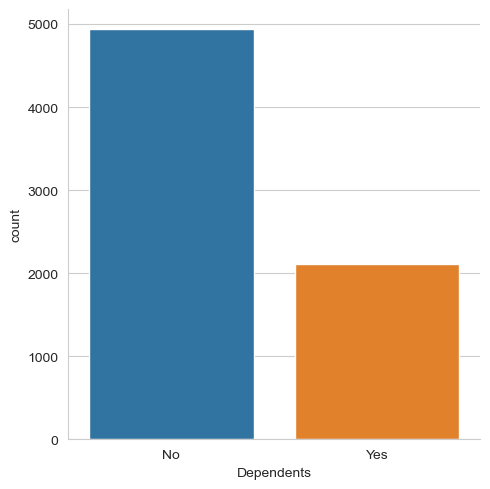

In [48]:
sns.catplot(x="Dependents", kind="count", data=data)
plt.show()


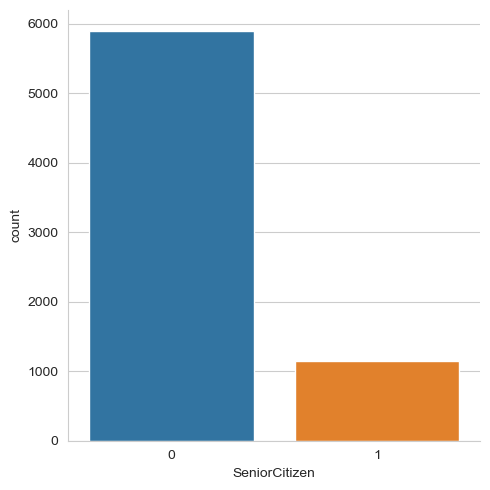

In [49]:
sns.catplot(x="SeniorCitizen", kind="count", data=data)
plt.show()

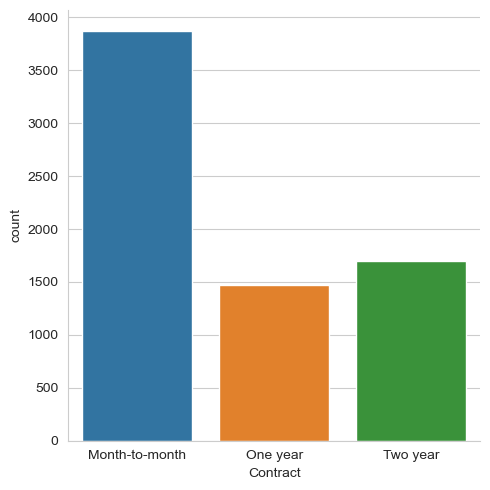

In [50]:
sns.catplot(x="Contract", kind="count", data=data)
plt.show()

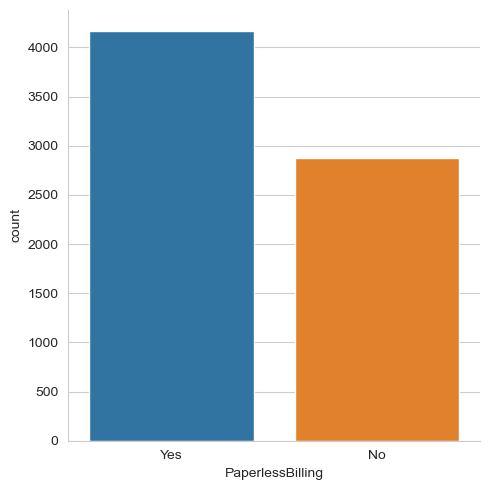

In [51]:
sns.catplot(x="PaperlessBilling", kind="count", data=data)
plt.show()

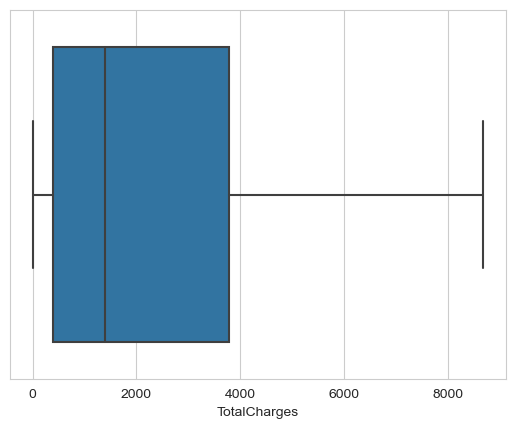

In [52]:
sns.boxplot(x=data["TotalCharges"])
plt.show()

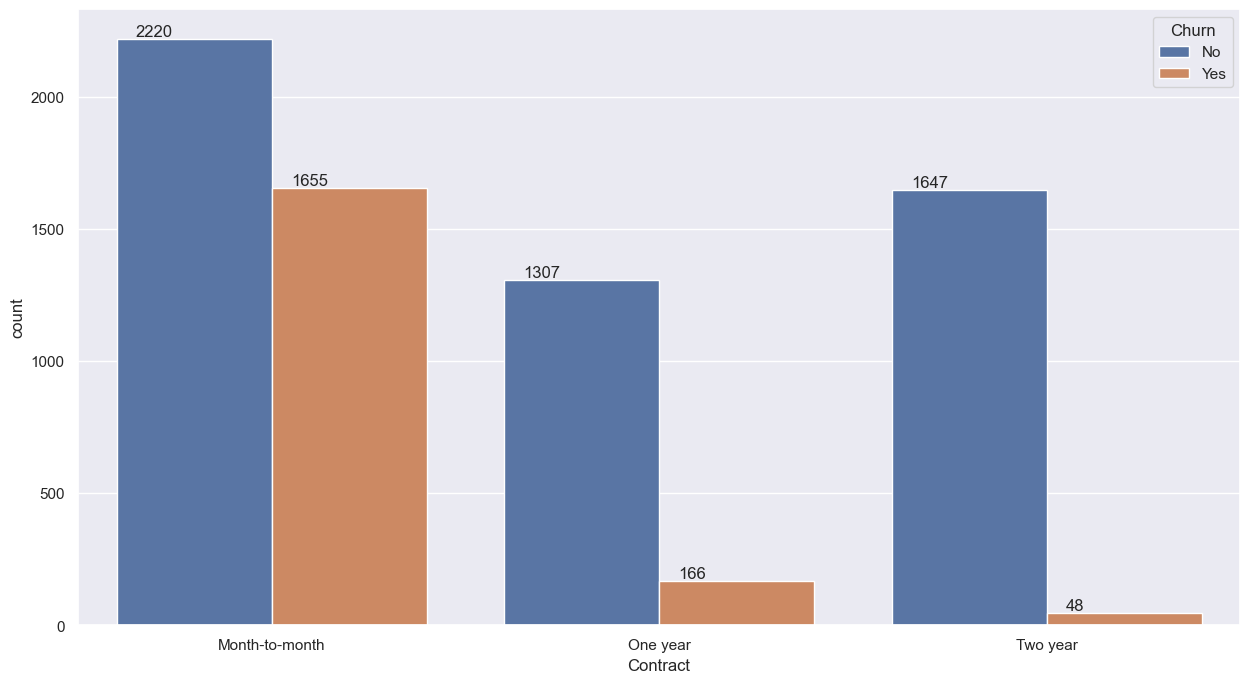

In [98]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Contract',hue='Churn',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

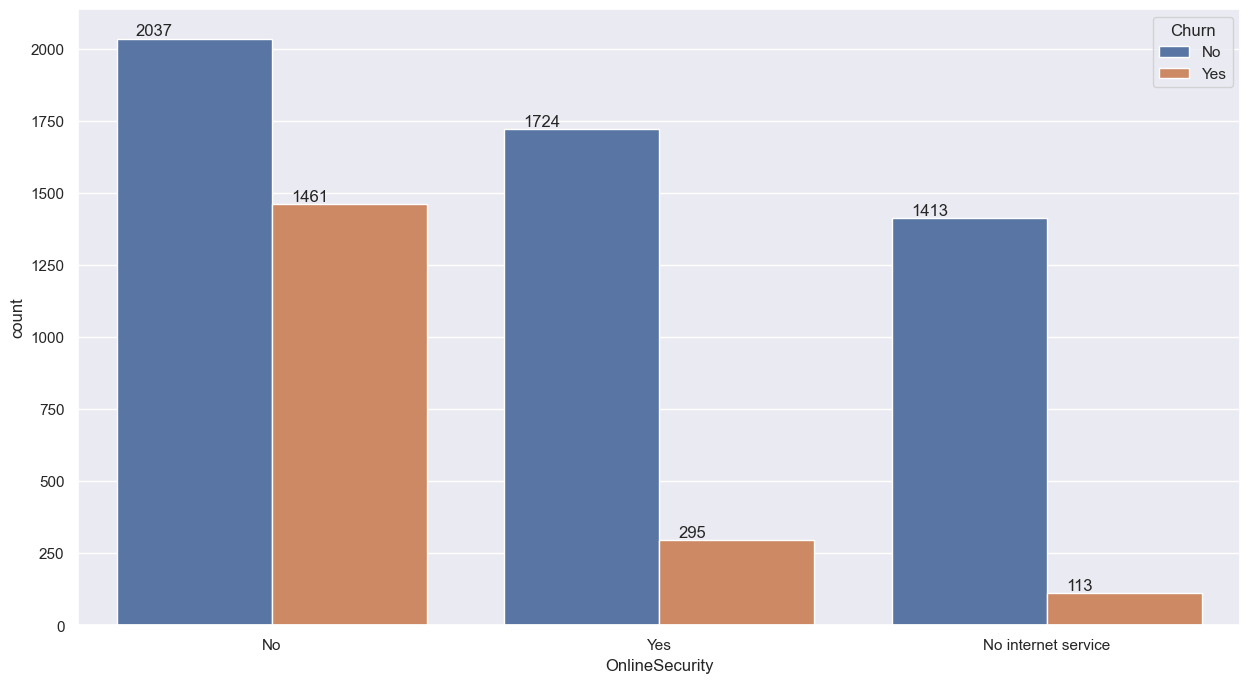

In [99]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

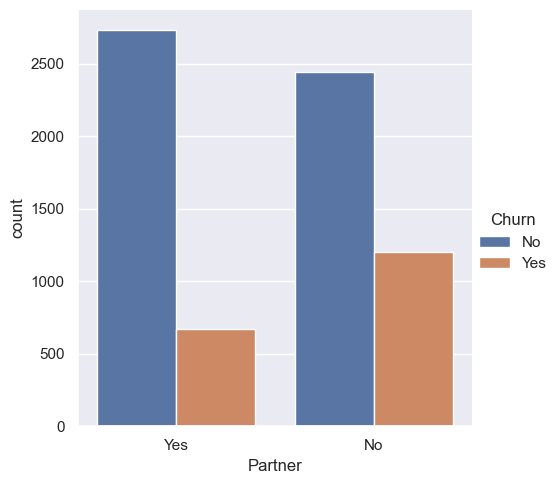

In [100]:
sns.catplot(x='Partner',hue='Churn',data=data, kind="count");


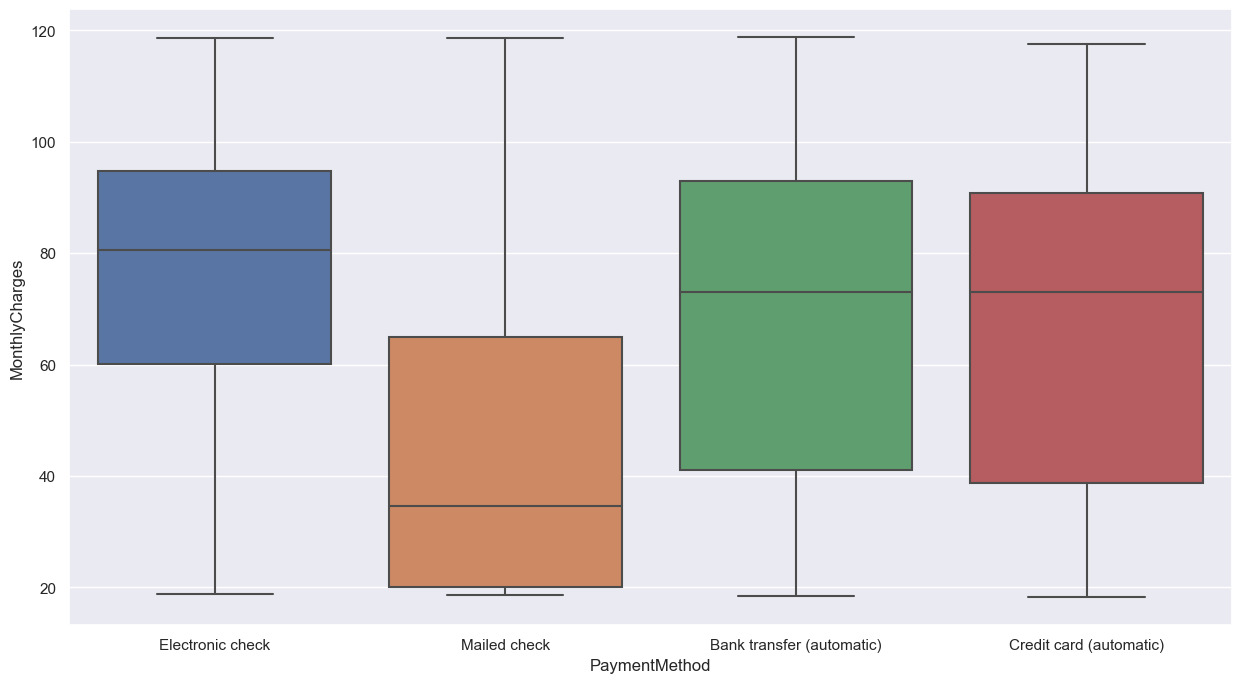

In [106]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=data)
plt.show()

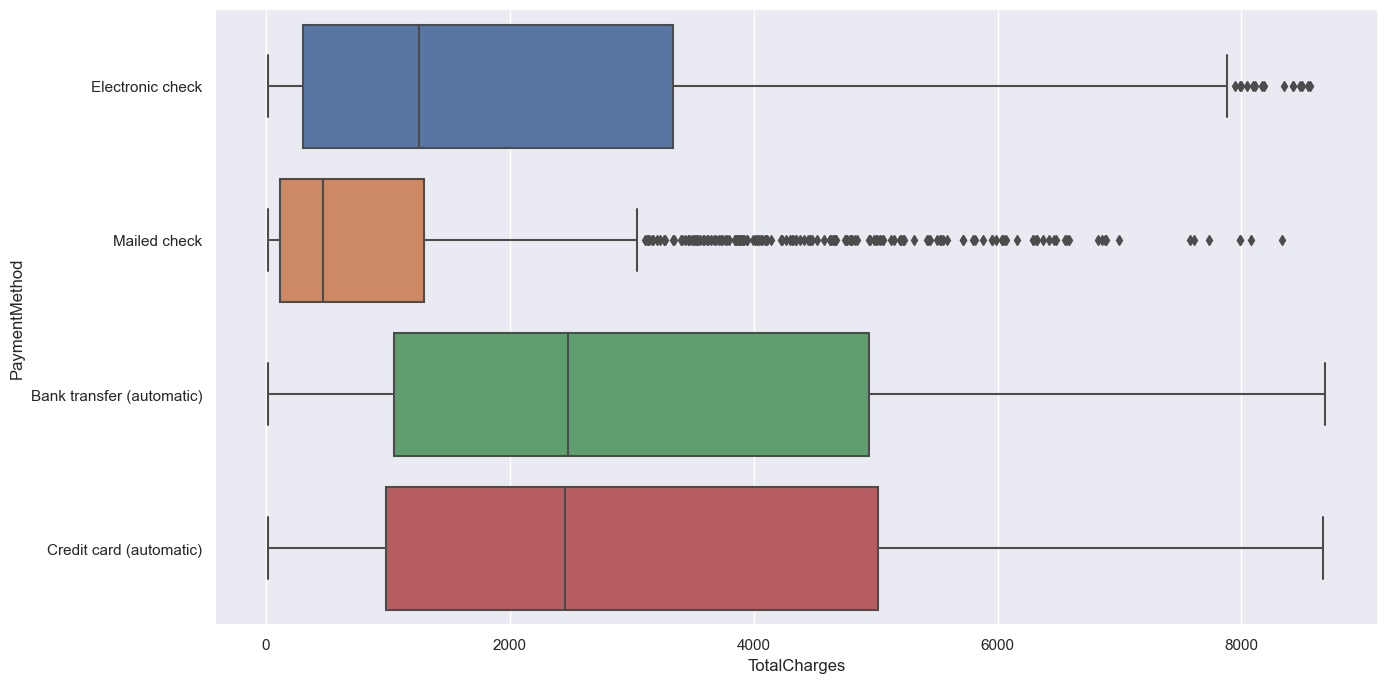

In [119]:
plt.figure
ax = sns.boxplot( x="TotalCharges",y="PaymentMethod", data=data)
plt.show()

In [118]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [123]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df_churn.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

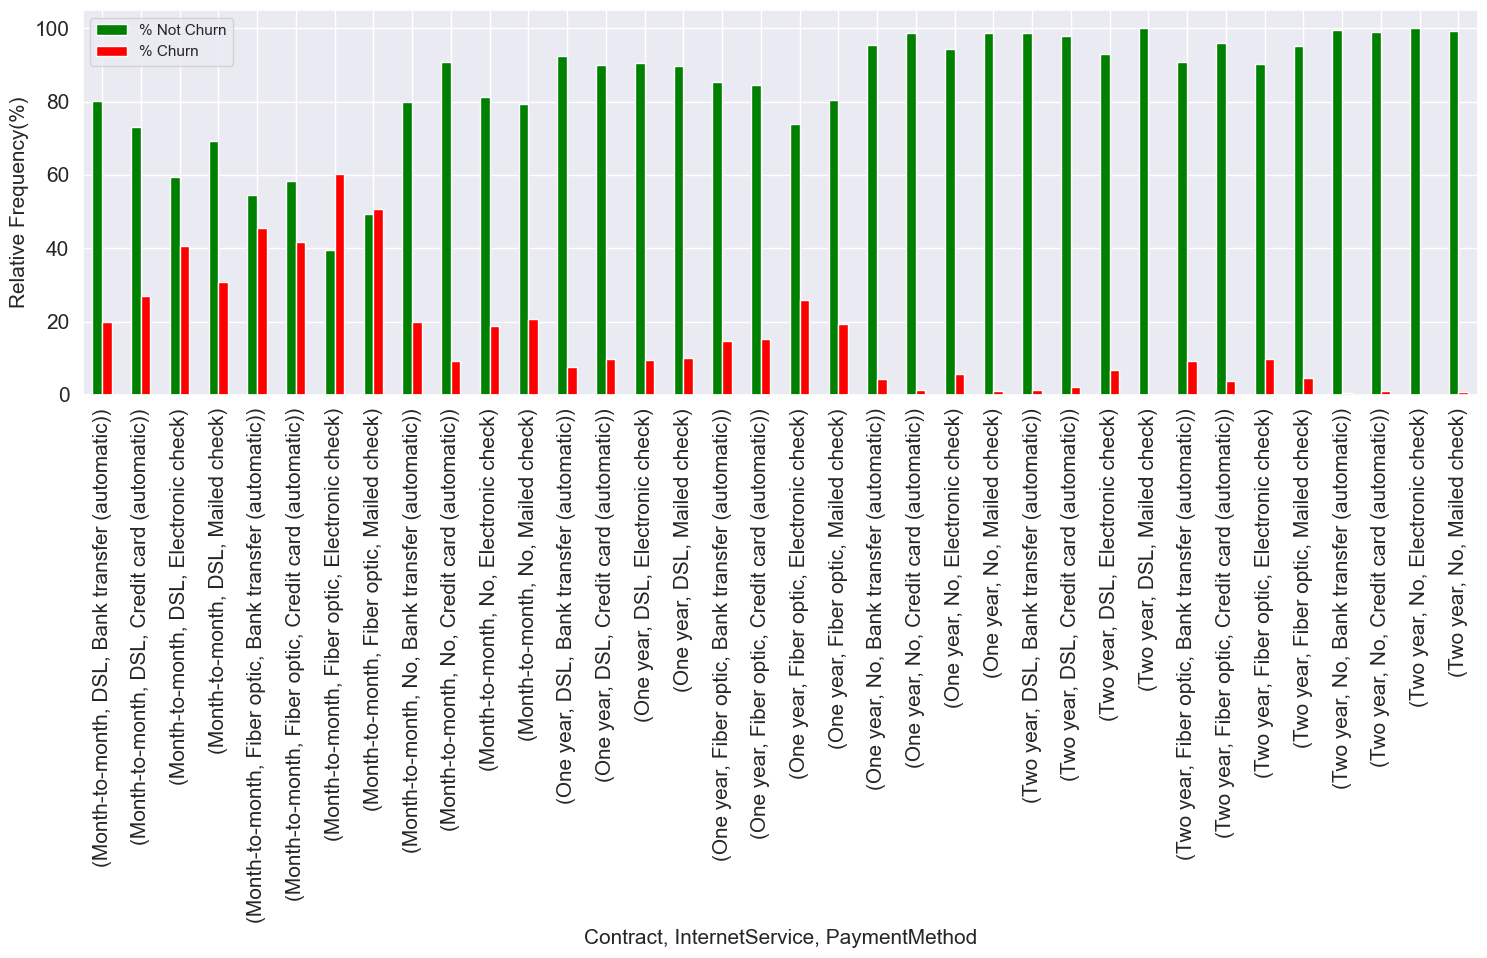

In [124]:
multivariate_analysis(data.Contract, data.InternetService, data.PaymentMethod)

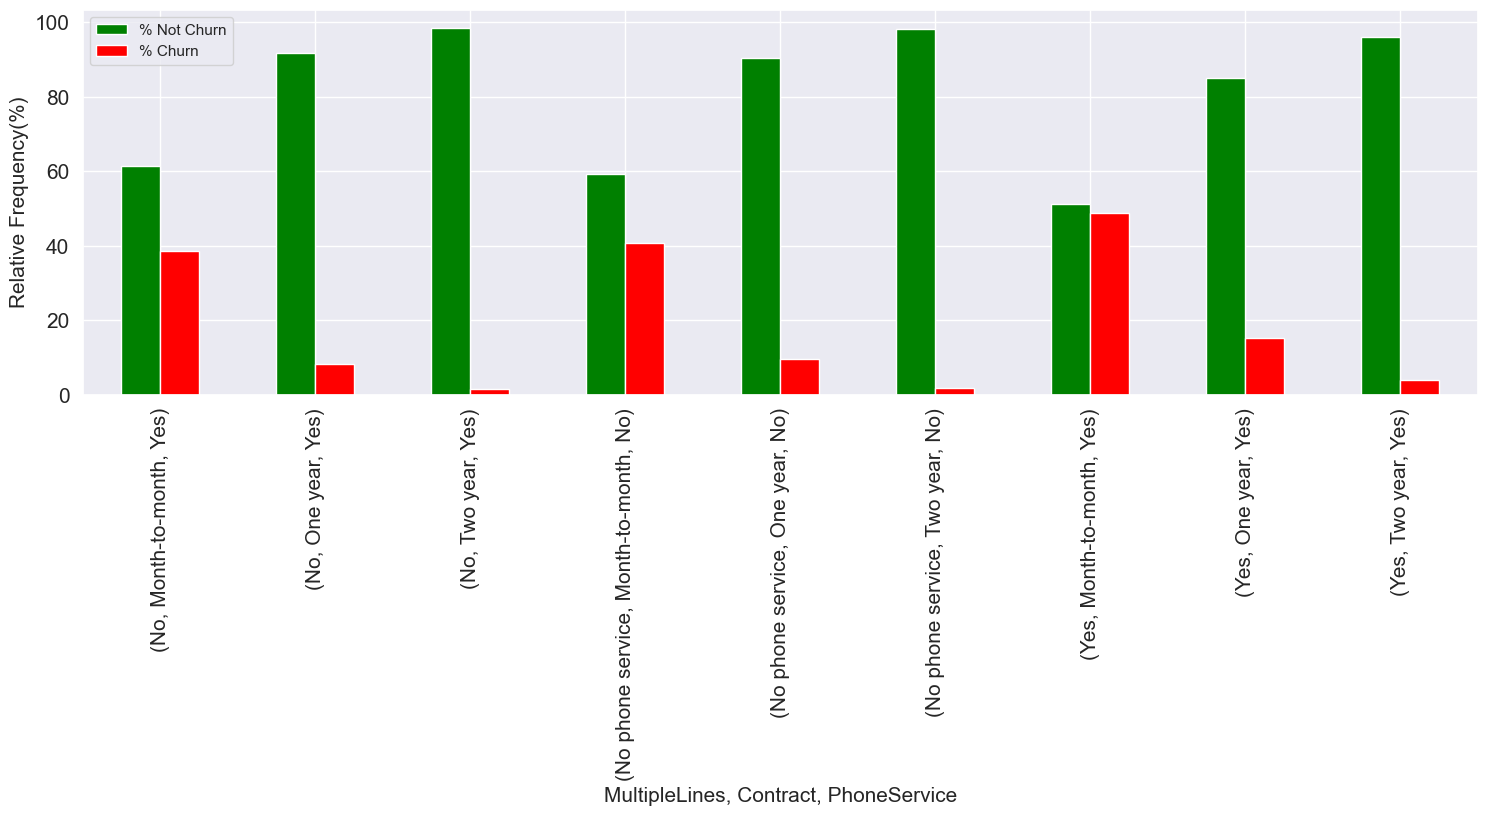

In [126]:
multivariate_analysis(df_churn.MultipleLines, df_churn['Contract'], df_churn.PhoneService)

In [3]:
data = pd.read_csv(r"C:\Users\range\Videos\pj\churn_dataset.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
dx=data[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

In [6]:
dx

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [7]:
dy=data[['Churn']]

In [8]:
dy

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [12]:
x_train, x_test, y_train, y_test = train_test_split(dx, dy, train_size=0.7, random_state=100)

In [11]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
dx1=x_train[['gender','Partner','Dependents','PhoneService','PaperlessBilling','InternetService','PaymentMethod']]

In [14]:
dx1

,gender,Partner,Dependents,PhoneService,PaperlessBilling,InternetService,PaymentMethod
877,Female,No,Yes,No,No,DSL,Bank transfer (automatic)
5792,Female,No,No,Yes,Yes,Fiber optic,Mailed check
5334,Female,Yes,Yes,Yes,Yes,Fiber optic,Bank transfer (automatic)
878,Female,No,No,Yes,No,DSL,Electronic check
6578,Female,No,Yes,Yes,No,DSL,Credit card (automatic)
...,...,...,...,...,...,...,...
79,Female,Yes,Yes,Yes,Yes,No,Credit card (automatic)
3927,Male,Yes,No,Yes,Yes,No,Credit card (automatic)
5955,Male,Yes,Yes,Yes,No,DSL,Bank transfer (automatic)
6936,Male,Yes,Yes,Yes,Yes,Fiber optic,Electronic check


In [15]:
dx_1 = pd.get_dummies(dx1,drop_first=True)

In [16]:
dx_1

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,0,0,1,0,0,0,0,0,0,0
5792,0,0,0,1,1,1,0,0,0,1
5334,0,1,1,1,1,1,0,0,0,0
878,0,0,0,1,0,0,0,0,1,0
6578,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,1,1,0,1,1,0,0
3927,1,1,0,1,1,0,1,1,0,0
5955,1,1,1,1,0,0,0,0,0,0
6936,1,1,1,1,1,1,0,0,1,0


In [17]:
dxx1 = pd.concat([dx_1,x_train['SeniorCitizen']], axis=1)

In [18]:
dxx1

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
877,0,0,1,0,0,0,0,0,0,0,0
5792,0,0,0,1,1,1,0,0,0,1,1
5334,0,1,1,1,1,1,0,0,0,0,0
878,0,0,0,1,0,0,0,0,1,0,0
6578,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,1,1,0,1,1,0,0,0
3927,1,1,0,1,1,0,1,1,0,0,0
5955,1,1,1,1,0,0,0,0,0,0,0
6936,1,1,1,1,1,1,0,0,1,0,0


In [19]:
dx2=x_train[['tenure','MonthlyCharges','TotalCharges']]

In [20]:
dx2

,tenure,MonthlyCharges,TotalCharges
877,51,60.15,3077
5792,15,96.30,1426.75
5334,49,107.95,5293.2
878,60,64.75,4039.5
6578,10,73.55,693.3
...,...,...,...
79,45,25.90,1216.6
3927,3,20.55,51.15
5955,72,68.40,4855.35
6936,5,80.15,385


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


dxx2 = pd.DataFrame(scaler.fit_transform(dx2), 
                                    columns = dx2.columns, 
                                    index = dx2.index)
dxx2

,tenure,MonthlyCharges,TotalCharges
877,0.754422,-0.145568,0.348921
5792,-0.710751,1.051796,-0.380014
5334,0.673024,1.437668,1.327842
878,1.120716,0.006794,0.774068
6578,-0.914247,0.298268,-0.703987
...,...,...,...
79,0.510227,-1.279999,-0.472839
3927,-1.199142,-1.457203,-0.987632
5955,1.609107,0.127689,1.134438
6936,-1.117744,0.516874,-0.840167


In [53]:
dx2['TotalCharges'] = pd.to_numeric(dx2['TotalCharges'],errors='coerce')

C:\Users\range\AppData\Local\Temp\ipykernel_17252\3754118489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx2['TotalCharges'] = pd.to_numeric(dx2['TotalCharges'],errors='coerce')


In [54]:
dx3=x_train[['OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines','Contract']]

In [55]:
dx3

,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,Yes,Yes,Yes,Yes,Yes,No phone service,One year
5792,Yes,Yes,Yes,No,Yes,No,Month-to-month
5334,No,Yes,Yes,Yes,Yes,Yes,Two year
878,Yes,Yes,Yes,No,No,Yes,One year
6578,Yes,Yes,Yes,No,Yes,Yes,One year
...,...,...,...,...,...,...,...
79,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,One year
3927,No internet service,No internet service,No internet service,No internet service,No internet service,No,Month-to-month
5955,Yes,No,Yes,Yes,No,No,Two year
6936,No,No,No,No,No,Yes,Month-to-month


In [56]:
dx3.TechSupport.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [57]:
code = {'Yes':3, 'No':2, 'No internet service':1}

dx3['OnlineSecurity'] = dx3['OnlineSecurity'].apply(lambda x : code[x])

dx3

C:\Users\range\AppData\Local\Temp\ipykernel_17252\655255133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx3['OnlineSecurity'] = dx3['OnlineSecurity'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,3,Yes,Yes,Yes,Yes,No phone service,One year
5792,3,Yes,Yes,No,Yes,No,Month-to-month
5334,2,Yes,Yes,Yes,Yes,Yes,Two year
878,3,Yes,Yes,No,No,Yes,One year
6578,3,Yes,Yes,No,Yes,Yes,One year
...,...,...,...,...,...,...,...
79,1,No internet service,No internet service,No internet service,No internet service,Yes,One year
3927,1,No internet service,No internet service,No internet service,No internet service,No,Month-to-month
5955,3,No,Yes,Yes,No,No,Two year
6936,2,No,No,No,No,Yes,Month-to-month


In [58]:
code = {'Yes':3, 'No':2, 'No internet service':1}

dx3['DeviceProtection'] = dx3['DeviceProtection'].apply(lambda x : code[x])

dx3

C:\Users\range\AppData\Local\Temp\ipykernel_17252\559985397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx3['DeviceProtection'] = dx3['DeviceProtection'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,3,3,Yes,Yes,Yes,No phone service,One year
5792,3,3,Yes,No,Yes,No,Month-to-month
5334,2,3,Yes,Yes,Yes,Yes,Two year
878,3,3,Yes,No,No,Yes,One year
6578,3,3,Yes,No,Yes,Yes,One year
...,...,...,...,...,...,...,...
79,1,1,No internet service,No internet service,No internet service,Yes,One year
3927,1,1,No internet service,No internet service,No internet service,No,Month-to-month
5955,3,2,Yes,Yes,No,No,Two year
6936,2,2,No,No,No,Yes,Month-to-month


In [59]:
code = {'Yes':3, 'No':2, 'No internet service':1}

dx3['TechSupport'] = dx3['TechSupport'].apply(lambda x : code[x])

dx3

C:\Users\range\AppData\Local\Temp\ipykernel_17252\770601064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx3['TechSupport'] = dx3['TechSupport'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,3,3,3,Yes,Yes,No phone service,One year
5792,3,3,3,No,Yes,No,Month-to-month
5334,2,3,3,Yes,Yes,Yes,Two year
878,3,3,3,No,No,Yes,One year
6578,3,3,3,No,Yes,Yes,One year
...,...,...,...,...,...,...,...
79,1,1,1,No internet service,No internet service,Yes,One year
3927,1,1,1,No internet service,No internet service,No,Month-to-month
5955,3,2,3,Yes,No,No,Two year
6936,2,2,2,No,No,Yes,Month-to-month


In [60]:
code = {'Yes':3, 'No':2, 'No internet service':1}

dx3['StreamingMovies'] = dx3['StreamingMovies'].apply(lambda x : code[x])

dx3

C:\Users\range\AppData\Local\Temp\ipykernel_17252\3010370439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx3['StreamingMovies'] = dx3['StreamingMovies'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,3,3,3,Yes,3,No phone service,One year
5792,3,3,3,No,3,No,Month-to-month
5334,2,3,3,Yes,3,Yes,Two year
878,3,3,3,No,2,Yes,One year
6578,3,3,3,No,3,Yes,One year
...,...,...,...,...,...,...,...
79,1,1,1,No internet service,1,Yes,One year
3927,1,1,1,No internet service,1,No,Month-to-month
5955,3,2,3,Yes,2,No,Two year
6936,2,2,2,No,2,Yes,Month-to-month


In [61]:
code = {'No phone service':1, 'No':2, 'Yes':3}

dx3['MultipleLines'] = dx3['MultipleLines'].apply(lambda x : code[x])

dx3

C:\Users\range\AppData\Local\Temp\ipykernel_17252\2888532995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx3['MultipleLines'] = dx3['MultipleLines'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,3,3,3,Yes,3,1,One year
5792,3,3,3,No,3,2,Month-to-month
5334,2,3,3,Yes,3,3,Two year
878,3,3,3,No,2,3,One year
6578,3,3,3,No,3,3,One year
...,...,...,...,...,...,...,...
79,1,1,1,No internet service,1,3,One year
3927,1,1,1,No internet service,1,2,Month-to-month
5955,3,2,3,Yes,2,2,Two year
6936,2,2,2,No,2,3,Month-to-month


In [62]:
code = {'Month-to-month':1, 'One year':2, 'Two year':3}

dx3['Contract'] = dx3['Contract'].apply(lambda x : code[x])

dx3

C:\Users\range\AppData\Local\Temp\ipykernel_17252\2872461482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx3['Contract'] = dx3['Contract'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,3,3,3,Yes,3,1,2
5792,3,3,3,No,3,2,1
5334,2,3,3,Yes,3,3,3
878,3,3,3,No,2,3,2
6578,3,3,3,No,3,3,2
...,...,...,...,...,...,...,...
79,1,1,1,No internet service,1,3,2
3927,1,1,1,No internet service,1,2,1
5955,3,2,3,Yes,2,2,3
6936,2,2,2,No,2,3,1


In [63]:
code = {'No internet service':1, 'No':2, 'Yes':3}

dx3['StreamingTV'] = dx3['StreamingTV'].apply(lambda x : code[x])

dx3

C:\Users\range\AppData\Local\Temp\ipykernel_17252\1517596998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx3['StreamingTV'] = dx3['StreamingTV'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,3,3,3,3,3,1,2
5792,3,3,3,2,3,2,1
5334,2,3,3,3,3,3,3
878,3,3,3,2,2,3,2
6578,3,3,3,2,3,3,2
...,...,...,...,...,...,...,...
79,1,1,1,1,1,3,2
3927,1,1,1,1,1,2,1
5955,3,2,3,3,2,2,3
6936,2,2,2,2,2,3,1


In [64]:
dtx = pd.concat([dxx1,dxx2,dx3], axis=1)

In [65]:
dtx

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
877,0,0,1,0,0,0,0,0,0,0,...,0.754422,-0.145568,0.348921,3,3,3,3,3,1,2
5792,0,0,0,1,1,1,0,0,0,1,...,-0.710751,1.051796,-0.380014,3,3,3,2,3,2,1
5334,0,1,1,1,1,1,0,0,0,0,...,0.673024,1.437668,1.327842,2,3,3,3,3,3,3
878,0,0,0,1,0,0,0,0,1,0,...,1.120716,0.006794,0.774068,3,3,3,2,2,3,2
6578,0,0,1,1,0,0,0,1,0,0,...,-0.914247,0.298268,-0.703987,3,3,3,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,1,1,0,1,1,0,0,...,0.510227,-1.279999,-0.472839,1,1,1,1,1,3,2
3927,1,1,0,1,1,0,1,1,0,0,...,-1.199142,-1.457203,-0.987632,1,1,1,1,1,2,1
5955,1,1,1,1,0,0,0,0,0,0,...,1.609107,0.127689,1.134438,3,2,3,3,2,2,3
6936,1,1,1,1,1,1,0,0,1,0,...,-1.117744,0.516874,-0.840167,2,2,2,2,2,3,1


In [90]:
dtx.isnull().sum()

0

In [76]:
dtx.isnull().

array([False,  True])

In [36]:
y_train=np.expand_dims(y_train,axis=0)

In [47]:
y_train

array([[['No'],
        ['Yes'],
        ['Yes'],
        ...,
        ['No'],
        ['Yes'],
        ['Yes']]], dtype=object)

In [89]:
dtx=dtx.fillna(data.mean())

C:\Users\range\AppData\Local\Temp\ipykernel_17252\3659768776.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dtx=dtx.fillna(data.mean())


In [85]:
dtx=dtx.fillna(dtx.mean())

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
fx1=x_test[['gender','Partner','Dependents','PhoneService','PaperlessBilling','InternetService','PaymentMethod']]

In [43]:
fx_1 = pd.get_dummies(fx1,drop_first=True)

In [44]:
fx_1

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1,1,0,1,0,0,1,0,0,1
1541,1,0,0,1,0,0,1,0,0,0
1289,1,0,0,1,0,0,0,0,0,0
5745,0,1,1,1,1,0,1,0,0,1
4873,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1285,1,1,0,1,1,1,0,0,1,0
5092,0,1,1,1,0,0,1,0,0,1
5837,0,0,0,0,0,0,0,0,1,0
3597,1,1,0,1,1,1,0,1,0,0


In [45]:
fxx1 = pd.concat([fx_1,x_test['SeniorCitizen']], axis=1)

In [46]:
fxx1

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
4880,1,1,0,1,0,0,1,0,0,1,0
1541,1,0,0,1,0,0,1,0,0,0,0
1289,1,0,0,1,0,0,0,0,0,0,0
5745,0,1,1,1,1,0,1,0,0,1,0
4873,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1285,1,1,0,1,1,1,0,0,1,0,1
5092,0,1,1,1,0,0,1,0,0,1,0
5837,0,0,0,0,0,0,0,0,1,0,0
3597,1,1,0,1,1,1,0,1,0,0,0


In [47]:
fx2=x_test[['tenure','MonthlyCharges','TotalCharges']]

In [48]:
fx2['TotalCharges'] = pd.to_numeric(fx2['TotalCharges'],errors='coerce')

C:\Users\range\AppData\Local\Temp\ipykernel_10396\1164294690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx2['TotalCharges'] = pd.to_numeric(fx2['TotalCharges'],errors='coerce')


In [49]:
fxx2 = pd.DataFrame(scaler.transform(fx2), 
                                    columns = fx2.columns, 
                                    index = fx2.index)
fxx2

,tenure,MonthlyCharges,TotalCharges
4880,0.713723,-1.457203,-0.538632
1541,1.609107,-1.480388,-0.376767
1289,1.242814,0.140938,0.805805
5745,1.161415,-1.336307,-0.371864
4873,-1.036345,-1.498605,-0.946200
...,...,...,...
1285,-1.036345,0.826565,-0.711319
5092,-1.036345,-1.460515,-0.943638
5837,-1.239842,-0.435386,-0.967468
3597,-0.303759,1.031922,0.022651


In [50]:
fx3=x_test[['OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines','Contract']]

In [51]:
code = {'Yes':3, 'No':2, 'No internet service':1}

fx3['OnlineSecurity'] = fx3['OnlineSecurity'].apply(lambda x : code[x])

fx3

C:\Users\range\AppData\Local\Temp\ipykernel_10396\1771135942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx3['OnlineSecurity'] = fx3['OnlineSecurity'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,No internet service,No internet service,No internet service,No internet service,No,Two year
1541,1,No internet service,No internet service,No internet service,No internet service,No,Two year
1289,3,Yes,Yes,No,No,Yes,One year
5745,1,No internet service,No internet service,No internet service,No internet service,Yes,Two year
4873,1,No internet service,No internet service,No internet service,No internet service,No,Month-to-month
...,...,...,...,...,...,...,...
1285,2,No,No,Yes,Yes,No,Month-to-month
5092,1,No internet service,No internet service,No internet service,No internet service,No,Month-to-month
5837,2,No,No,Yes,Yes,No phone service,Month-to-month
3597,2,No,Yes,Yes,Yes,No,Month-to-month


In [52]:
code = {'Yes':3, 'No':2, 'No internet service':1}

fx3['StreamingMovies'] = fx3['StreamingMovies'].apply(lambda x : code[x])

fx3

C:\Users\range\AppData\Local\Temp\ipykernel_10396\4270858381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx3['StreamingMovies'] = fx3['StreamingMovies'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,No internet service,No internet service,No internet service,1,No,Two year
1541,1,No internet service,No internet service,No internet service,1,No,Two year
1289,3,Yes,Yes,No,2,Yes,One year
5745,1,No internet service,No internet service,No internet service,1,Yes,Two year
4873,1,No internet service,No internet service,No internet service,1,No,Month-to-month
...,...,...,...,...,...,...,...
1285,2,No,No,Yes,3,No,Month-to-month
5092,1,No internet service,No internet service,No internet service,1,No,Month-to-month
5837,2,No,No,Yes,3,No phone service,Month-to-month
3597,2,No,Yes,Yes,3,No,Month-to-month


In [53]:
code = {'No phone service':1, 'No':2, 'Yes':3}

fx3['MultipleLines'] = fx3['MultipleLines'].apply(lambda x : code[x])

fx3

C:\Users\range\AppData\Local\Temp\ipykernel_10396\3691558646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx3['MultipleLines'] = fx3['MultipleLines'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,No internet service,No internet service,No internet service,1,2,Two year
1541,1,No internet service,No internet service,No internet service,1,2,Two year
1289,3,Yes,Yes,No,2,3,One year
5745,1,No internet service,No internet service,No internet service,1,3,Two year
4873,1,No internet service,No internet service,No internet service,1,2,Month-to-month
...,...,...,...,...,...,...,...
1285,2,No,No,Yes,3,2,Month-to-month
5092,1,No internet service,No internet service,No internet service,1,2,Month-to-month
5837,2,No,No,Yes,3,1,Month-to-month
3597,2,No,Yes,Yes,3,2,Month-to-month


In [54]:
code = {'Month-to-month':1, 'One year':2, 'Two year':3}

fx3['Contract'] = fx3['Contract'].apply(lambda x : code[x])

fx3

C:\Users\range\AppData\Local\Temp\ipykernel_10396\3035482482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx3['Contract'] = fx3['Contract'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,No internet service,No internet service,No internet service,1,2,3
1541,1,No internet service,No internet service,No internet service,1,2,3
1289,3,Yes,Yes,No,2,3,2
5745,1,No internet service,No internet service,No internet service,1,3,3
4873,1,No internet service,No internet service,No internet service,1,2,1
...,...,...,...,...,...,...,...
1285,2,No,No,Yes,3,2,1
5092,1,No internet service,No internet service,No internet service,1,2,1
5837,2,No,No,Yes,3,1,1
3597,2,No,Yes,Yes,3,2,1


In [55]:
fx3

,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,No internet service,No internet service,No internet service,1,2,3
1541,1,No internet service,No internet service,No internet service,1,2,3
1289,3,Yes,Yes,No,2,3,2
5745,1,No internet service,No internet service,No internet service,1,3,3
4873,1,No internet service,No internet service,No internet service,1,2,1
...,...,...,...,...,...,...,...
1285,2,No,No,Yes,3,2,1
5092,1,No internet service,No internet service,No internet service,1,2,1
5837,2,No,No,Yes,3,1,1
3597,2,No,Yes,Yes,3,2,1


In [58]:
code = {'No internet service':1, 'No':2, 'Yes':3}

fx3['DeviceProtection'] = fx3['DeviceProtection'].apply(lambda x : code[x])

fx3

C:\Users\range\AppData\Local\Temp\ipykernel_10396\1984826522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx3['DeviceProtection'] = fx3['DeviceProtection'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,1,No internet service,No internet service,1,2,3
1541,1,1,No internet service,No internet service,1,2,3
1289,3,3,Yes,No,2,3,2
5745,1,1,No internet service,No internet service,1,3,3
4873,1,1,No internet service,No internet service,1,2,1
...,...,...,...,...,...,...,...
1285,2,2,No,Yes,3,2,1
5092,1,1,No internet service,No internet service,1,2,1
5837,2,2,No,Yes,3,1,1
3597,2,2,Yes,Yes,3,2,1


In [59]:
code = {'No internet service':1, 'No':2, 'Yes':3}

fx3['TechSupport'] = fx3['TechSupport'].apply(lambda x : code[x])

fx3

C:\Users\range\AppData\Local\Temp\ipykernel_10396\4165244960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx3['TechSupport'] = fx3['TechSupport'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,1,1,No internet service,1,2,3
1541,1,1,1,No internet service,1,2,3
1289,3,3,3,No,2,3,2
5745,1,1,1,No internet service,1,3,3
4873,1,1,1,No internet service,1,2,1
...,...,...,...,...,...,...,...
1285,2,2,2,Yes,3,2,1
5092,1,1,1,No internet service,1,2,1
5837,2,2,2,Yes,3,1,1
3597,2,2,3,Yes,3,2,1


In [60]:
code = {'No internet service':1, 'No':2, 'Yes':3}

fx3['StreamingTV'] = fx3['StreamingTV'].apply(lambda x : code[x])

fx3

C:\Users\range\AppData\Local\Temp\ipykernel_10396\758696096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fx3['StreamingTV'] = fx3['StreamingTV'].apply(lambda x : code[x])


,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,1,1,1,1,2,3
1541,1,1,1,1,1,2,3
1289,3,3,3,2,2,3,2
5745,1,1,1,1,1,3,3
4873,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...
1285,2,2,2,3,3,2,1
5092,1,1,1,1,1,2,1
5837,2,2,2,3,3,1,1
3597,2,2,3,3,3,2,1


In [61]:
ffx = pd.concat([fxx1,fxx2,fx3], axis=1)

In [62]:
ffx

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract
4880,1,1,0,1,0,0,1,0,0,1,...,0.713723,-1.457203,-0.538632,1,1,1,1,1,2,3
1541,1,0,0,1,0,0,1,0,0,0,...,1.609107,-1.480388,-0.376767,1,1,1,1,1,2,3
1289,1,0,0,1,0,0,0,0,0,0,...,1.242814,0.140938,0.805805,3,3,3,2,2,3,2
5745,0,1,1,1,1,0,1,0,0,1,...,1.161415,-1.336307,-0.371864,1,1,1,1,1,3,3
4873,0,0,0,1,0,0,1,0,0,1,...,-1.036345,-1.498605,-0.946200,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,1,1,0,1,1,1,0,0,1,0,...,-1.036345,0.826565,-0.711319,2,2,2,3,3,2,1
5092,0,1,1,1,0,0,1,0,0,1,...,-1.036345,-1.460515,-0.943638,1,1,1,1,1,2,1
5837,0,0,0,0,0,0,0,0,1,0,...,-1.239842,-0.435386,-0.967468,2,2,2,3,3,1,1
3597,1,1,0,1,1,1,0,1,0,0,...,-0.303759,1.031922,0.022651,2,2,3,3,3,2,1


In [64]:
ffx=ffx["TotalCharges"].fillna(data.mean())

C:\Users\range\AppData\Local\Temp\ipykernel_10396\4140076642.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ffx=ffx["TotalCharges"].fillna(data.mean())


In [65]:
ffx.isnull().any()

True

In [70]:
ffx.dtypes

dtype('float64')

In [72]:
dtx.dtypes

dtype('float64')

In [77]:
y_train.unique()

array(['No', 'Yes'], dtype=object)

In [83]:
y_train.array.reshape(-1,1)

<PandasArray>
[
['No'],
['Yes'],
['Yes'],
['No'],
['No'],
['Yes'],
['Yes'],
['No'],
['Yes'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['Yes'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['No'],
['Yes'],
['Yes'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['Yes'],
['No'],
['No'],
['No'],
['Yes'],
['Yes'],
['No'],
['Y

In [89]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.791292001893043

In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(dtx, y_train)

y_test_pred = classifier.predict(ffx)

metrics.accuracy_score(y_test, y_test_pred)

0.7614765735920492

In [92]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(dtx, y_train)

y_test_pred = classifier.predict(ffx)

metrics.accuracy_score(y_test, y_test_pred)

0.7278750591575959

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(dtx, y_train)

y_test_pred = classifier.predict(ffx)

metrics.accuracy_score(y_test, y_test_pred)

0.7889256980596309